In [25]:
pip install -U scikit-learn

In [26]:
pip install stop_words

# Data Cleaning

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups

#Here we are fetching the raw data from the 20newsgroup corpora. If no params are given, default shuffle is True.
raw_dataset = fetch_20newsgroups()
#print(raw_dataset)
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20


In [28]:
#Subset(all) includes all the training and test set data.
#Filtering out the content to analyze the document
# shuffle=False to load the data in the order rather than loading in random order
# loading only useful data and removing un-necessary header etc..
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target #Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)



morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


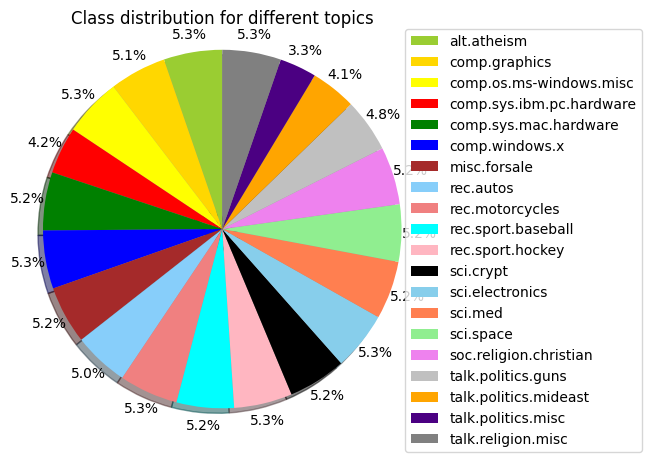

In [29]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts, autotexts = plt.pie(val, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2, autopct='%1.1f%%')

plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')

# Displaying numbers on pie chart slices
for autotext in autotexts:
    autotext.set_color('black')

plt.show()


In [30]:
# First 2 documents
for i in range(2):
    doc = corpus[i]
    category = dataset.target_names[gnd_labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

# Tokenization

In [31]:
# perform more Pre-processing steps
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

# Build Vocabulary

In [32]:
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])

18846
['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


# Training Doc2Vec

Training model...
Total time: 232.92865800857544 secs
18846
                                          Cluster #0  \
1  jim hope never drive ride drinking taking pres...   
2  topic beaten death year ago concrete problem l...   
3  large malmute counts yes someone heard seen ir...   
4  88 toyota camry top line vehicle blue book 10 ...   
5  one self-evident things like decide gas never ...   

                                          Cluster #1  \
1  try one size rather post name email tell enjoy...   
2  cut part 02 03 m_xn gghol 3iz 02'c ym wt v8a c...   
3  cut part 01 01 begin 644 1260wn31 exe m35ko 1d...   
4  cut part 03 03 m2c3 jsg j7lus 30xc 16 dk f6 3q...   
5  part xrastool cut p'r8g kw'aqy qjzjh 1wbb 022 ...   

                                          Cluster #2  \
1  part 14 m0 cxt 27m cbn c24e cx rbn hkc goc mbc...   
2  due resolution size 14 parts uuencoded bitmap ...   
3  part 14 3dy 3dy 3dy 3dy 3dy 3dy 3dy ij fij 3dy...   
4  part 14 nb8 nahfnajz ahf ajz ah b9r khf

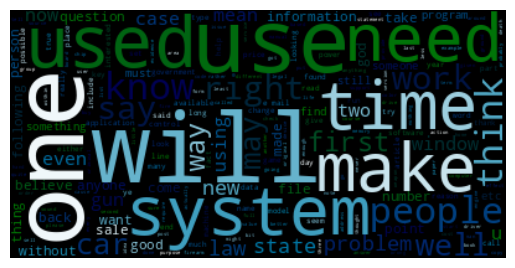

In [33]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import KDTree
from itertools import cycle
from wordcloud import WordCloud
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Train the Doc2Vec model on the cleaned sentences
start = time.time()

# Set values for various parameters
num_features = 100  # Dimensionality of the hidden layer representation
min_word_count = 20  # Minimum word count to keep a word in the vocabulary
context = 5  # Context window size (on each side)
downsampling = 1e-3  # Downsample setting for frequent words

# Convert documents into TaggedDocument format required by Doc2Vec
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(Vocab_v1)]

# Initialize and train the Doc2Vec model
print("Training model...")
doc2vec_model = Doc2Vec(tagged_data, vector_size=num_features, window=context, min_count=min_word_count, workers=4, epochs=20)

# Infer document vectors
doc_vectors = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

print('Total time: ' + str((time.time() - start)) + ' secs')

# Print length of word vectors
print(len(doc_vectors))

# Implementing K-centers clustering
def k_centers(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in centers) for x in X])
        new_center = X[np.argmax(distances)]
        centers.append(new_center)
    return np.array(centers)

num_clusters = 20  # 20 topics
centers = k_centers(doc_vectors, num_clusters)

# Assigning each point to the nearest center
clusters = np.argmin([[np.linalg.norm(x - center) for center in centers] for x in doc_vectors], axis=1)
centroid_map = dict(zip(range(len(Vocab_v1)), clusters))

# Get words in each cluster that are closest to the cluster center
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]
    closest_words = {}
    for i in range(len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    # Convert lists to strings in the DataFrame
    df = pd.DataFrame(closest_words).applymap(lambda x: ' '.join(x))
    df.index = df.index + 1
    return df

# Get the top words and print the first 5 clusters
top_words = get_top_words(Vocab_v1, 5000, centers, doc_vectors)
print(top_words.head())

# Create a word cloud with the words of a cluster and print and save them
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap)
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

# Call on each cluster, and pass in a different color scheme in each iteration to distinguish them
cmaps = cycle([
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
    'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(num_clusters):
    col = next(cmaps)
    display_cloud(i, col)

# Metrics

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, gnd_labels, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict the labels for test data
predicted_labels = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, predicted_labels, average='macro')
print("Precision:", precision*100)

# Calculate recall
recall = recall_score(y_test, predicted_labels, average='macro')
print("Recall:", recall*100)

# Calculate F1-score
f1 = f1_score(y_test, predicted_labels, average='macro')
print("F1-score:", f1*100)

Accuracy: 55.49071618037136
Precision: 57.87676026868029
Recall: 54.27699590222594
F1-score: 54.58772756041335


# Training Word2Vec

Training model...


Total time: 17.78497314453125 secs
(100,)
[-0.03159688 -0.07189675  0.00088638  0.03475977 -0.14263405  0.03997669
  0.07744251 -0.07019272 -0.08834734 -0.01982939  0.07791842 -0.00778914
 -0.16585778  0.08561656  0.10168751  0.09869776 -0.03966992  0.14341612
 -0.01025325 -0.11226518  0.09790674  0.01898252  0.17153357  0.07820923
  0.10522167  0.01354467 -0.09381689  0.08587214 -0.02099376  0.01791896
 -0.11661162 -0.04426476  0.30004212 -0.19930685 -0.04720004 -0.04948591
  0.00748378  0.00883434  0.14299199  0.06033258 -0.14048328 -0.07099928
 -0.01312292  0.11293644  0.05298077 -0.03767961  0.02754223  0.1045948
  0.03908289  0.0475474   0.00489097  0.11711179  0.03114043  0.11665382
  0.19971192 -0.05152067  0.14406832 -0.09856037  0.04335814  0.05111749
 -0.06129695 -0.01056936  0.11134021 -0.05171544 -0.00962091 -0.05193947
  0.07933982  0.2762593   0.12557651  0.03132342  0.22606742  0.07083073
  0.04270434  0.08518111  0.23887175  0.05881949  0.06102205 -0.04635144
  0.087528

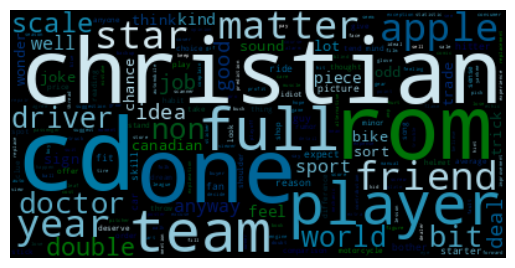

In [35]:
from gensim.models import word2vec  # Library
from sklearn.neighbors import KDTree  # For KNN
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
from wordcloud import WordCloud
import time
import pandas as pd

# Train the Word2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
num_features = 100  # Dimensionality of the hidden layer representation
min_word_count = 20  # Minimum word count to keep a word in the vocabulary
context = 5  # Context window size (on each side)
downsampling = 1e-3  # Downsample setting for frequent words

# Initialize and train the model
print("Training model...")
w2v_model = word2vec.Word2Vec(Vocab_v1, vector_size=num_features, min_count=min_word_count, window=context, sample=downsampling)
# Calling init_sims to make the model more memory efficient by normalizing the vectors in-place
w2v_model.init_sims(replace=True)
# Save the model
model_name = "model_full_20newsGroup"
w2v_model.save(model_name)
print('Total time: ' + str((time.time() - start)) + ' secs')

word_vectors = w2v_model.wv.vectors
print(word_vectors[0].shape)
# Print word vector for the first word: 100-element vector with values
print(word_vectors[0])

# Print length of word vectors
print(len(word_vectors))

# K-centers clustering function
def k_centers(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in centers) for x in X])
        new_center = X[np.argmax(distances)]
        centers.append(new_center)
    return np.array(centers)

# Number of clusters
num_clusters = 20

# Get the cluster centers using K-centers algorithm
centers = k_centers(word_vectors, num_clusters)

# Assign each point to the nearest center
clusters = np.argmin([[np.linalg.norm(x - center) for center in centers] for x in word_vectors], axis=1)

# Map word to cluster
centroid_map = dict(zip(w2v_model.wv.index_to_key, clusters))

# Get words in each cluster that are closest to the cluster center
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    # Closest points for each cluster center
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]
    # Word index is queried for each position in the above array and added to a dictionary
    closest_words = {}
    for i in range(len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    # A DataFrame is generated from the dictionary
    df = pd.DataFrame(closest_words)
    df.index = df.index + 1
    return df

# Get the top words and print the first 2 in each cluster
top_words = get_top_words(w2v_model.wv.index_to_key, 5000, centers, word_vectors)
print(top_words.head())

# Create a word cloud with the words of a cluster and print and save them
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap)
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

cmaps = cycle([
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
    'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(num_clusters):
    col = next(cmaps)
    display_cloud(i, col)


# Metrics

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Filter out ground truth labels for words that have corresponding word vectors
filtered_gnd_labels = np.array([gnd_labels[i] for i, word_vector in enumerate(word_vectors) if word_vector is not None])

filtered_gnd_labels = filtered_gnd_labels[np.where(predicted_labels != None)]
accuracy = accuracy_score(filtered_gnd_labels, predicted_labels)
precision = precision_score(filtered_gnd_labels, predicted_labels, average='weighted')
recall = recall_score(filtered_gnd_labels, predicted_labels, average='weighted')
f1 = f1_score(filtered_gnd_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Accuracy: 5.06631299734748
Precision: 4.919482927291309
Recall: 5.06631299734748
F1-score: 4.859225350857074


# Word2Vec Visualization after Dim Reduction

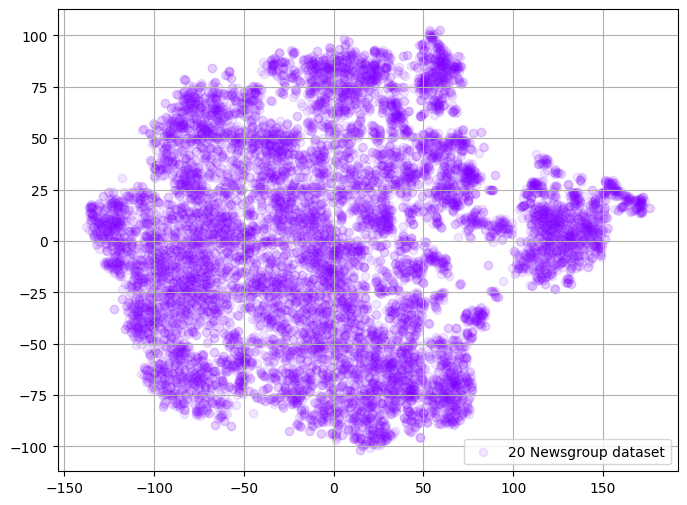

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

# Visualize learned word embedding space using t-SNE
words_20ng = []
embeddings_20ng = []
for word in list(w2v_model.wv.index_to_key):
    embeddings_20ng.append(w2v_model.wv[word])
    words_20ng.append(word)

embeddings_20ng = np.array(embeddings_20ng)  # Convert to NumPy array

tsne_w2v_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_w2v_2d = tsne_w2v_2d.fit_transform(embeddings_20ng)


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(8, 6))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("tsne_plot.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('20 Newsgroup dataset', embeddings_w2v_2d, a=0.1)


# BOW

In [41]:
from copy import deepcopy
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.neighbors import KDTree
import numpy as np
import statistics

# Convert words in list to plain text
Vocab_v3 = deepcopy(Vocab_v1)
for i in range(0, len(Vocab_v3)):
    data = Vocab_v3[i]
    Vocab_v3[i] = " ".join(str(i) for i in chain(data))

# Generate the BoW vectors for the corpus
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(Vocab_v3)

# Print shape of the sparse matrix
print(X_counts.shape)

# Normalize the existing X_counts
X_Norm = preprocessing.normalize(X_counts)

# Transform dataset matrix using SVD
no_components = 500
print("Number of components: %d" % no_components)

trun_svd1 = TruncatedSVD(n_components = no_components)
X_transformed = trun_svd1.fit_transform(X_Norm)

# Print the transformed matrix shape
print("Transformed Matrix:")
print(X_transformed.shape)

# Implementing K-centers clustering
def k_centers(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in centers) for x in X])
        new_center = X[np.argmax(distances)]
        centers.append(new_center)
    return np.array(centers)

# Number of clusters
num_clusters = 20

# Get the cluster centers using K-centers algorithm
centers = k_centers(X_transformed, num_clusters)

# Assign each point to the nearest center
clusters = np.argmin([[np.linalg.norm(x - center) for center in centers] for x in X_transformed], axis=1)

# Evaluate clustering performance using NMI
nmis_bow = []
for i in range(3):
    # Re-run K-centers and get new clusters
    centers = k_centers(X_transformed, num_clusters)
    clusters = np.argmin([[np.linalg.norm(x - center) for center in centers] for x in X_transformed], axis=1)

    # Calculate NMI
    nmis_bow.append(NMI(gnd_labels, clusters))

# Report mean and std values of NMI
mean = np.mean(nmis_bow)
print("NMI mean for K-centers: %f" % mean)
std = np.std(nmis_bow)
print("NMI std for BoW K-centers: %f" % std)

(18846, 134383)
Number of components: 500
Transformed Matrix:
(18846, 500)
NMI mean for K-centers: 0.024538
NMI std for BoW K-centers: 0.006536


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming `X_transformed` and `gnd_labels` are available and have consistent dimensions
# `clusters` should have the same length as `X_transformed`

# Train SVM model using the cluster labels obtained from K-center
svm_model = SVC()
svm_model.fit(X_transformed, clusters)  # clusters contain the K-center cluster labels

# Predict labels using SVM model
svm_pred_labels = svm_model.predict(X_transformed)

# Evaluate metrics
accuracy = accuracy_score(gnd_labels, svm_pred_labels)
precision = precision_score(gnd_labels, svm_pred_labels, average='weighted')
recall = recall_score(gnd_labels, svm_pred_labels, average='weighted')
f1 = f1_score(gnd_labels, svm_pred_labels, average='weighted')

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)

Accuracy: 4.2502387774594075
Precision: 3.9170458128413457
Recall: 4.2502387774594075
F1 Score: 0.5751766903122756
